In [2]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 11.8 s, sys: 1.5 s, total: 13.3 s
Wall time: 31.8 s


# Import Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/HOLD/training_data_telugu-hate.xlsx")
test_df= pd.read_excel("/content/drive/MyDrive/Colab Notebooks/HOLD/telugu-hate-speech-test.xlsx")
test_with_label = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/HOLD/telugu-english-test-data-with-labels.xlsx")
print("Total number of training samples:", len(train_df))
print("Total number of test samples:", len(test_df))

Total number of training samples: 4000
Total number of test samples: 499


In [5]:
test_with_label

1 ‡∞é‡∞®‡±ç‡∞®‡∞ø ‡∞∏‡∞æ‡∞∞‡±ç‡∞≤‡±Å ‡∞Ö‡∞Ø‡∞ø‡∞® ‡∞µ‡∞ø‡∞®‡∞æ‡∞≤‡∞®‡∞ø ‡∞â‡∞Ç‡∞¶‡∞ø ‡∞ö‡∞ø‡∞ü‡±ç‡∞ü‡∞ø ‡∞§‡∞≤‡±ç‡∞≤‡∞ø ‡∞∏‡±Ç‡∞™‡∞∞‡±ç ‡∞Æ‡∞æ,,  non-hate
0      2            ‡∞´‡±ç‡∞Ø‡±Ç‡∞ö‡∞∞‡±ç ‡∞≤‡±ã ‡∞¨‡∞æ‡∞ó work out ‡∞Ö‡∞µ‡±Å‡∞§‡±Å‡∞Ç‡∞¶‡∞ø ‡∞∏‡±Ç‡∞™‡∞∞‡±ç.      non-hate
1      3  ‡∞á‡∞¶‡∞ø ‡∞¨‡±Ü‡∞Ç‡∞°‡∞™‡±Ç‡∞°‡∞ø ‡∞ó‡∞µ‡±ç‡∞®‡∞Æ‡±Ü‡∞Ç‡∞ü‡±ç ‡∞∏‡±ç‡∞ü‡±Ç‡∞°‡±Ü‡∞Ç‡∞ü‡±ç‡∞∏‡±ç ‡∞ï‡∞ø ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Æ‡±á ...      non-hate
2      4  ‡∞§‡±Ü‡∞≤‡±Å‡∞ó‡±Å‡∞≤‡±ã ‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡∞ø‡∞®‡∞™‡±ç‡∞™‡±Å‡∞°‡±Å ‡∞ö‡∞æ‡∞≤‡∞æ ‡∞Ö‡∞Ç‡∞¶‡∞Ç‡∞ó‡∞æ ‡∞µ‡∞ø‡∞®‡∞∏‡±ä‡∞Ç‡∞™‡±Å‡∞ó...      non-hate
3      5  ‡∞∏‡±Ç‡∞™‡∞∞‡±ç ‡∞∏‡∞ø‡∞∏‡±ç‡∞ü‡∞∞‡±ç ‡∞´‡±ç‡∞Ø‡±Ç‡∞ö‡∞∞‡±ç ‡∞≤‡±ã ‡∞∞‡±à‡∞≤‡±ç‡∞µ‡±á ‡∞≤‡±ã ‡∞ú‡∞æ‡∞¨‡±ç ‡∞∞‡∞æ‡∞µ‡∞æ‡∞≤‡∞®...      non-hate
4      6                  ‡∞µ‡∞æ‡∞µ‡±ç ‡∞∏‡±Ç‡∞™‡∞∞‡±ç ‡∞Ö‡∞Æ‡±ç‡∞Æ god bless u ‡∞§‡∞≤‡±ç‡∞≤‡∞ø      non-hate
..   ...                                                ...           ...
494  496                      ‡∞°‡∞¨‡±ç‡∞¨‡±Å ‡∞á‡∞∏‡±ç‡∞§‡±á ‡∞®‡∞ø‡∞®‡±ç‡∞®‡±Å‡∞ï‡±Ç‡∞° ‡∞é‡∞∏‡±ç‡∞§‡∞æ‡∞°‡±Å          hate
495  497           ‡∞®‡∞ø‡∞¶‡∞ø ‡∞ö‡±Ç‡∞™‡∞ø‡∞Ç‡∞ö‡±Å ‡∞¶‡±Ü‡∞¨‡±ç‡∞¨‡∞ï‡∞ø ‡∞∏‡±Ü‡∞ü‡±ç ‡∞ê‡∞™‡±ã‡∞Ø‡∞ø‡∞¶‡∞ø ‡∞∞‡±ã‡∞ú‡∞æ‡∞ï‡±Å          hate
496  498    ‡∞è‡∞¶‡∞ø ‡∞®‡∞æ‡∞ï‡∞ø‡∞® ‡∞®‡±Ä‡∞¶‡∞ø ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞ï‡∞ö‡±ç‡∞ö‡∞ø‡∞§‡∞Ç‡∞ó‡∞æ ‡∞®‡∞æ‡∞ï‡∞°‡±Å ‡∞ö‡±Ä ‡∞∞‡±Ü‡∞°‡±ç‡∞°‡∞ø          hate
497  499               ‡∞á‡∞™‡±ç‡∞™‡±Å‡∞°‡±Å ‡∞®‡∞ø‡∞¶‡∞ø‡∞ê‡∞® ‡∞®‡∞ï‡±Å‡∞§‡∞æ‡∞°‡±Å ‡∞°‡∞¨‡±ç‡∞¨‡±Å‡∞≤‡±Å ‡∞á‡∞∏‡±ç‡∞§‡±á          hate
498  500               Emi echavaa  Andaru neelagaa nakaru           hate

[499 rows x 3 columns]

# Data Set Analysis

In [6]:
print(train_df.shape)
print(test_df.shape)

(4000, 3)
(499, 2)


In [7]:
train_df.head(20)

S.No                                           Comments     Label
0   HATE_1001  Thappu chesina vaallaku vanike kaadu inka anni...      hate
1   HATE_1002  Dhusta chaathuryam!  Meeru ilantivi enni chesi...      hate
2   HATE_1003  Vetakaram super. Govt ki siggu seram radu. End...      hate
3   HATE_1004  Only rajakiyam ga vadukovatanike ee dharidrapu...      hate
4   HATE_1005         Katam hogaya narayana pedda bokada college      hate
5   HATE_1006  TELUGU DESAM PARTY ONLY GOOD ADMINISTRATION IN...  non-hate
6   HATE_1007  Nenu aite Jabardast show chudadam manesanu TV ...  non-hate
7   HATE_1008  Jagan meeda jaganke visvasam ledu anduke ea lo...      hate
8   HATE_1009                      Students tho adukovtam thappu  non-hate
9   HATE_1010  Srinivasa gaaru endukee panikamaalina debate.....      hate
10  HATE_1011  Meru mi media published cheyadam vallane elant...  non-hate
11  HATE_1012       One of the Great Leader, A Big Salute Sir.,,  non-hate
12  HATE_1013  Mogavalla face luu mathram manchiga chupisthar...      hate
13  HATE_1014                                Paniki malina chana      hate
14  HATE_1015  Rosayya garu is a real, Good and true politici...  non-hate
15  HATE_1016                         Telangana gujju gulam kadu      hate
16  HATE_1017                               Disevulera mundamopi      hate
17  HATE_1018  Anta manchi job chestu govt ki tala vanchi bra...      hate
18  HATE_1019                     Down To Earth Man Rosaiah Garu  non-hate
19  HATE_1020                              Jagan is unstoppable   non-hate

In [8]:
test_df

1 ‡∞é‡∞®‡±ç‡∞®‡∞ø ‡∞∏‡∞æ‡∞∞‡±ç‡∞≤‡±Å ‡∞Ö‡∞Ø‡∞ø‡∞® ‡∞µ‡∞ø‡∞®‡∞æ‡∞≤‡∞®‡∞ø ‡∞â‡∞Ç‡∞¶‡∞ø ‡∞ö‡∞ø‡∞ü‡±ç‡∞ü‡∞ø ‡∞§‡∞≤‡±ç‡∞≤‡∞ø ‡∞∏‡±Ç‡∞™‡∞∞‡±ç ‡∞Æ‡∞æ,,
0      2            ‡∞´‡±ç‡∞Ø‡±Ç‡∞ö‡∞∞‡±ç ‡∞≤‡±ã ‡∞¨‡∞æ‡∞ó work out ‡∞Ö‡∞µ‡±Å‡∞§‡±Å‡∞Ç‡∞¶‡∞ø ‡∞∏‡±Ç‡∞™‡∞∞‡±ç.    
1      3  ‡∞á‡∞¶‡∞ø ‡∞¨‡±Ü‡∞Ç‡∞°‡∞™‡±Ç‡∞°‡∞ø ‡∞ó‡∞µ‡±ç‡∞®‡∞Æ‡±Ü‡∞Ç‡∞ü‡±ç ‡∞∏‡±ç‡∞ü‡±Ç‡∞°‡±Ü‡∞Ç‡∞ü‡±ç‡∞∏‡±ç ‡∞ï‡∞ø ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Æ‡±á ...    
2      4  ‡∞§‡±Ü‡∞≤‡±Å‡∞ó‡±Å‡∞≤‡±ã ‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡∞ø‡∞®‡∞™‡±ç‡∞™‡±Å‡∞°‡±Å ‡∞ö‡∞æ‡∞≤‡∞æ ‡∞Ö‡∞Ç‡∞¶‡∞Ç‡∞ó‡∞æ ‡∞µ‡∞ø‡∞®‡∞∏‡±ä‡∞Ç‡∞™‡±Å‡∞ó...    
3      5  ‡∞∏‡±Ç‡∞™‡∞∞‡±ç ‡∞∏‡∞ø‡∞∏‡±ç‡∞ü‡∞∞‡±ç ‡∞´‡±ç‡∞Ø‡±Ç‡∞ö‡∞∞‡±ç ‡∞≤‡±ã ‡∞∞‡±à‡∞≤‡±ç‡∞µ‡±á ‡∞≤‡±ã ‡∞ú‡∞æ‡∞¨‡±ç ‡∞∞‡∞æ‡∞µ‡∞æ‡∞≤‡∞®...    
4      6                  ‡∞µ‡∞æ‡∞µ‡±ç ‡∞∏‡±Ç‡∞™‡∞∞‡±ç ‡∞Ö‡∞Æ‡±ç‡∞Æ god bless u ‡∞§‡∞≤‡±ç‡∞≤‡∞ø    
..   ...                                                ...    
494  496                      ‡∞°‡∞¨‡±ç‡∞¨‡±Å ‡∞á‡∞∏‡±ç‡∞§‡±á ‡∞®‡∞ø‡∞®‡±ç‡∞®‡±Å‡∞ï‡±Ç‡∞° ‡∞é‡∞∏‡±ç‡∞§‡∞æ‡∞°‡±Å    
495  497           ‡∞®‡∞ø‡∞¶‡∞ø ‡∞ö‡±Ç‡∞™‡∞ø‡∞Ç‡∞ö‡±Å ‡∞¶‡±Ü‡∞¨‡±ç‡∞¨‡∞ï‡∞ø ‡∞∏‡±Ü‡∞ü‡±ç ‡∞ê‡∞™‡±ã‡∞Ø‡∞ø‡∞¶‡∞ø ‡∞∞‡±ã‡∞ú‡∞æ‡∞ï‡±Å    
496  498    ‡∞è‡∞¶‡∞ø ‡∞®‡∞æ‡∞ï‡∞ø‡∞® ‡∞®‡±Ä‡∞¶‡∞ø ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞ï‡∞ö‡±ç‡∞ö‡∞ø‡∞§‡∞Ç‡∞ó‡∞æ ‡∞®‡∞æ‡∞ï‡∞°‡±Å ‡∞ö‡±Ä ‡∞∞‡±Ü‡∞°‡±ç‡∞°‡∞ø    
497  499               ‡∞á‡∞™‡±ç‡∞™‡±Å‡∞°‡±Å ‡∞®‡∞ø‡∞¶‡∞ø‡∞ê‡∞® ‡∞®‡∞ï‡±Å‡∞§‡∞æ‡∞°‡±Å ‡∞°‡∞¨‡±ç‡∞¨‡±Å‡∞≤‡±Å ‡∞á‡∞∏‡±ç‡∞§‡±á    
498  500               Emi echavaa  Andaru neelagaa nakaru     

[499 rows x 2 columns]

In [9]:
test_df.columns = ['id', 'text']

In [10]:
test_with_label.columns = ['id', 'text', 'label']

In [11]:
test_df.head()

id                                               text
0   2            ‡∞´‡±ç‡∞Ø‡±Ç‡∞ö‡∞∞‡±ç ‡∞≤‡±ã ‡∞¨‡∞æ‡∞ó work out ‡∞Ö‡∞µ‡±Å‡∞§‡±Å‡∞Ç‡∞¶‡∞ø ‡∞∏‡±Ç‡∞™‡∞∞‡±ç.
1   3  ‡∞á‡∞¶‡∞ø ‡∞¨‡±Ü‡∞Ç‡∞°‡∞™‡±Ç‡∞°‡∞ø ‡∞ó‡∞µ‡±ç‡∞®‡∞Æ‡±Ü‡∞Ç‡∞ü‡±ç ‡∞∏‡±ç‡∞ü‡±Ç‡∞°‡±Ü‡∞Ç‡∞ü‡±ç‡∞∏‡±ç ‡∞ï‡∞ø ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Æ‡±á ...
2   4  ‡∞§‡±Ü‡∞≤‡±Å‡∞ó‡±Å‡∞≤‡±ã ‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡∞ø‡∞®‡∞™‡±ç‡∞™‡±Å‡∞°‡±Å ‡∞ö‡∞æ‡∞≤‡∞æ ‡∞Ö‡∞Ç‡∞¶‡∞Ç‡∞ó‡∞æ ‡∞µ‡∞ø‡∞®‡∞∏‡±ä‡∞Ç‡∞™‡±Å‡∞ó...
3   5  ‡∞∏‡±Ç‡∞™‡∞∞‡±ç ‡∞∏‡∞ø‡∞∏‡±ç‡∞ü‡∞∞‡±ç ‡∞´‡±ç‡∞Ø‡±Ç‡∞ö‡∞∞‡±ç ‡∞≤‡±ã ‡∞∞‡±à‡∞≤‡±ç‡∞µ‡±á ‡∞≤‡±ã ‡∞ú‡∞æ‡∞¨‡±ç ‡∞∞‡∞æ‡∞µ‡∞æ‡∞≤‡∞®...
4   6                  ‡∞µ‡∞æ‡∞µ‡±ç ‡∞∏‡±Ç‡∞™‡∞∞‡±ç ‡∞Ö‡∞Æ‡±ç‡∞Æ god bless u ‡∞§‡∞≤‡±ç‡∞≤‡∞ø

In [12]:
train_corpus = train_df["Comments"].sum()
test_corpus = test_df['text'].sum()
#test_corpus

In [13]:
import re

train_corpus = train_df["Comments"].sum()
test_corpus = test_df["text"].sum()

# Remove punctuations
chars_to_ignore = '[-,\.:;\'"\!?‡•§]'

train_corpus = re.sub(chars_to_ignore, ' ', train_corpus)
train_vocab = set(train_corpus.split())

test_corpus = re.sub(chars_to_ignore, ' ', test_corpus)
test_vocab = set(test_corpus.split())

oov = test_vocab - train_vocab

print("Number of unique words in training data:", len(train_vocab))
print("Number of unique words in test data:", len(test_vocab))
print("Number of out-of-vocabulary (OOV) words:", len(oov))

Number of unique words in training data: 17097
Number of unique words in test data: 2361
Number of out-of-vocabulary (OOV) words: 1167


In [14]:
filtered_train = train_df[lambda x: x["Comments"].str.contains("[A-Za-z0-9]")]

with pd.option_context('display.max_colwidth', 0):
    display(filtered_train.tail(n=5))

S.No                                                 Comments Label
3981  HATE_4982  Roja chala goranga ayipothundh                           hate
3983  HATE_4984  Telugu rastrala nayakulu matlade matalaku pichilestundi  hate
3985  HATE_4986  Roja lanj...donga mund.                                  hate
3988  HATE_4989  ‡∞®‡±Ä expression ‡∞ö‡±Ç‡∞∏‡±ç‡∞§‡±Å‡∞Ç‡∞ü‡±á ‡∞è‡∞¶‡±ã ‡∞Æ‡∞∞‡±ç‡∞°‡∞∞‡±ç, ‡∞∞‡±á‡∞™‡±ç ‡∞ú‡∞∞‡∞ø‡∞ó‡∞ø‡∞®‡∞ü‡±ç‡∞ü‡±Å.     hate
3995  HATE_4996  ‡∞®‡∞ø‡∞ú‡∞æ‡∞Ø‡∞ø‡∞§‡±Ä‡∞™‡∞∞‡±Å‡∞°‡∞Ç‡∞ü....same ‡∞¨‡∞æ‡∞∏‡±ç ‡∞ï‡±ç‡∞µ‡∞æ‡∞≤‡∞ø‡∞ü‡±Ä‡∞∏‡±ç ‡∞ö‡∞æ‡∞≤‡∞æ ‡∞â‡∞®‡±ç‡∞®‡∞æ‡∞Ø‡∞Ç‡∞ü.    hate

In [15]:
filtered_train.shape

(2664, 3)

In [16]:
print("Total Pure Tamil Sentence = ", train_df.shape[0] - filtered_train.shape[0])

Total Pure Tamil Sentence =  1336


# Preprocessing

In [17]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoj = re.compile("["         # this emoj is to remove all emojis
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)

    text = text.lower()

    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(url_pattern, ' ', text)

    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'(https|http|www)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ', text, flags=re.MULTILINE)


    text = emoji_pattern.sub(r' ', text)
    text = emoj.sub(r' ',text)

    text = text.replace('\n', ' ')
    text = text.replace('‚Äî', ' ')
    text = text.replace('_', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\w', ' ')

    text = re.sub(r'(\\)[a-zA-Z]+', ' ',text)

    text = re.sub(r'\s+', ' ', text)  #replace multiple space with single space

    return text

def remove_punctuations(my_str):
    # define punctuation
    #punctuations = '''````¬£|¬¢|√ë+-*/=‡ß≥‡ß¶‡ßß‡ß®‡ß©‡ß™‡ß´‡ß¨‡ß≠‡ßÆ‡ßØ012‚Äì34567‚Ä¢89‡•§!()-[]{};:'"‚Äú\‚Äô,<>./?@#$%^&*_~‚Äò‚Äî‡••‚Äù‚Ä∞ü§£‚öΩÔ∏è‚úåüòÄüòÉüòÑüòÅüòÜüòÖüòÇü§£üòäüòáüôÇüôÉüòâüòåüòçüòòüòóüòôüòöüòãüòõüòùüòúü§™ü§®üßêü§ìüòéü§©ü•≥üòèüòíüòûüòîüòüüòïüôÅ‚òπÔ∏èüò£üòñüò´üò©üò§üò†üò°ü§¨üòàüëøüíÄ‚ò†Ô∏èüí©ü§°üëπüë∫üëªüëΩüëæü§ñüíãüíåüíòüíùüíñüíóüíìüíûüíïüíü‚ù£Ô∏èüíî‚ù§Ô∏è‚Äçüî•üñ§ü§çüíØüí¢üí•üí´üí¶üí®üï≥Ô∏èüí£üí¨üëÅÔ∏è‚Äçüó®Ô∏èüó®Ô∏èüóØÔ∏èüí≠üí§üëãü§öüñêÔ∏è‚úãüññüëå‚úåÔ∏èü§ûü§üü§òü§ôüëàüëâüëÜüëá‚òùÔ∏è‚úçÔ∏èüëèüëèüèªüëèüèºüëèüèΩüëèüèæüëèüèøüëçüëçüèªüëçüèºüëçüèΩüëçüèæüëçüèøüëéüëéüèªüëéüèºüëéüèΩüëéüèæüëéüèø‚úä‚úäüèª‚úäüèº‚úäüèΩ‚úäüèæ‚úäüèøü§õü§õüèªü§õüèºü§õüèΩü§õüèæü§õüèøü§úü§úüèªü§úüèºü§úüèΩü§úüèæü§úüèøü§ùüôèüôèüèªüôèüèºüôèüèΩüôèüèæüôèüèø‚úçÔ∏èüíÖüíÖüèªüíÖüèºüíÖüèΩüíÖüèæüíÖüèøü§≥üí™üí™üèªüí™üèºüí™üèΩüí™üèæüí™üèøü¶æü¶µü¶øü¶∂üëÇüëÇüèªüëÇüèºüëÇüèΩüëÇüèæüëÇüèøüëÉüëÉüèªüëÉüèºüëÉüèΩüëÉüèæüëÉüèøüëÄüß†ü´Äü´Åü¶∑ü¶¥üëÖüëÑü¶ªü¶ªüèªü¶ªüèºü¶ªüèΩü¶ªüèæü¶ªüèøüë∂üë∂üèªüë∂üèºüë∂üèΩüë∂üèæüë∂üèøüßíüßíüèªüßíüèºüßíüèΩüßíüèæüßíüèøüë¶üë¶üèªüë¶üèºüë¶üèΩüë¶üèæüë¶üèøüëßüëßüèªüëßüèºüëßüèΩüëßüèæüëßüèøüßëüßëüèªüßëüèºüßëüèΩüßëüèæüßëüèøüë®üë®üèªüë®üèºüë®üèΩüë®üèæüë®üèøüë©üë©üèªüë©üèºüë©üèΩüë©üèæüë©üèøüßìüßìüèªüßìüèºüßìüèΩüßìüèæüßìüèøüë¥üë¥üèªüë¥üèºüë¥üèΩüë¥üèæüë¥üèøüëµüëµüèªüëµüèºüëµüèΩüëµüèæüëµüèøüë©‚Äçü¶∞üë©üèª‚Äçü¶∞üë©üèº‚Äçü¶∞üë©üèΩ‚Äçü¶∞üë©üèæ‚Äçü¶∞üë©üèø‚Äçü¶∞üë©‚Äçü¶±üë©üèª‚Äçü¶±üë©üèº‚Äçü¶±üë©üèΩ‚Äçü¶±üë©üèæ‚Äçü¶±üë©üèø‚Äçü¶±üë©‚Äçü¶≥üë©üèª‚Äçü¶≥üë©üèº‚Äçü¶≥üë©üèΩ‚Äçü¶≥üë©üèæ‚Äçü¶≥üë©üèø‚Äçü¶≥üë©‚Äçü¶≤üë©üèª‚Äçü¶≤üë©üèº‚Äçü¶≤üë©üèΩ‚Äçü¶≤üë©üèæ‚Äçü¶≤üë©üèø‚Äçü¶≤üë®‚Äçü¶∞üë®üèª‚Äçü¶∞üë®üèº‚Äçü¶∞üë®üèΩ‚Äçü¶∞üë®üèæ‚Äçü¶∞üë®üèø‚Äçü¶∞üë®‚Äçü¶±üë®üèª‚Äçü¶±üë®üèº‚Äçü¶±üë®üèΩ‚Äçü¶±üë®üèæ‚Äçü¶±üë®üèø‚Äçü¶±üë®‚Äçü¶≥üë®üèª‚Äçü¶≥üë®üèºüë®üèΩ‚Äçü¶≥üë®üèæ‚Äçü¶≥üë®üèø‚Äçü¶≥üë®‚Äçü¶≤üë®üèª‚Äçü¶≤üë®üèº‚Äçü¶≤üë®üèΩ‚Äçü¶≤üë®üèæ‚Äçü¶≤üë®üèø‚Äçü¶≤ü¶∞ü¶±ü¶≥ü¶≤üë±‚Äç‚ôÄÔ∏èüë±üèª‚Äç‚ôÄÔ∏è‚ù§Ô∏è‚Äçü©π‚ù§Ô∏è‚Äçüî•‚ù§Ô∏è‚Äçü©πüß°üíõüíöüíôüíúü§éÔøΩÔø∞‡ß∑Ôø∞'''
    punctuations = '|¬¢|√ë+-‡ß≥‡ß¶‡ßß‡ß®‡ß©‡ß™‡ß´‡ß¨‡ß≠‡ßÆ‡ßØ‡•§()-[]{}<>@#$%^&*_~‚Äî‡••ü§£‚öΩÔ∏è‚úåüòÄüíâÔøΩÔø∞‡ß∑Ôø∞'
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [18]:
train_df['cleanText'] = train_df.Comments.apply(lambda x: preprocessing(str(x)))
test_df['cleanText'] = test_df['text']
test_df['cleanText'] = test_df.cleanText.apply(lambda x: preprocessing(str(x)))

test_with_label['text'] = test_with_label.text.apply(lambda x: preprocessing(str(x)))

In [19]:
train_corpus = train_df["cleanText"].sum()
# train_corpus

In [20]:
train_df.tail(10)

S.No                                           Comments Label  \
3990  HATE_4991  ‡∞®‡±Å‡∞µ‡±ç‡∞µ‡±Å ‡∞®‡±Ä ‡∞ì‡∞µ‡∞∞‡±ç ‡∞Ø‡∞æ‡∞ï‡±ç‡∞∑‡∞®‡±ç .... ‡∞Æ‡±Ç‡∞µ‡±Ä‡∞∏‡±ç ‡∞≤‡±ã ‡∞õ‡∞æ‡∞®‡±ç‡∞∏‡±ç ‡∞ï...  hate   
3991  HATE_4992              ‡∞á‡∞ï ‡∞®‡±á‡∞®‡±Å ‡∞®‡±Å‡∞µ‡±ç‡∞µ‡±Å ‡∞á‡∞Ç‡∞ü‡∞∞‡±ç‡∞µ‡±ç‡∞Ø‡±Ç ‡∞ö‡±á‡∞∏‡∞ø‡∞®‡∞æ ‡∞ö‡±Ç‡∞°‡∞®‡±Å  hate   
3992  HATE_4993  ‡∞í‡∞ï ‡∞∏‡∞æ‡∞∞‡∞ø ‡∞®‡±Ä ‡∞Æ‡±Ä‡∞¶ ‡∞é‡∞®‡±ç‡∞®‡∞ø ‡∞ï‡∞æ‡∞Æ‡±Ü‡∞Ç‡∞ü‡±ç‡∞≤‡±Å  ‡∞∞‡∞æ‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±ã ‡∞ö...  hate   
3993  HATE_4994     ‡∞§‡∞™‡±ç‡∞™‡±Å ‡∞ö‡±á‡∞∏‡∞ø‡∞® ‡∞§‡∞∞‡±Å‡∞µ‡∞æ‡∞§ ‡∞µ‡∞ö‡±ç‡∞ö‡∞ø ‡∞ñ‡∞Æ‡±ç ‡∞ó‡∞æ ‡∞®‡±á ‡∞ï‡±Ç‡∞∞‡±ç‡∞ö‡±Å‡∞Ç‡∞ü‡∞æ‡∞∞‡±Å  hate   
3994  HATE_4995              ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡±Å‡∞§‡±ã ‡∞ï‡±ä‡∞ü‡±ç‡∞ü‡∞ø‡∞®‡∞ü‡±ç‡∞ü‡±Å ‡∞∏‡∞Æ‡∞æ‡∞ß‡∞æ‡∞®‡∞Ç ‡∞á‡∞ö‡±ç‡∞ö‡∞µ‡±Å‡∞ó‡∞æ  hate   
3995  HATE_4996  ‡∞®‡∞ø‡∞ú‡∞æ‡∞Ø‡∞ø‡∞§‡±Ä‡∞™‡∞∞‡±Å‡∞°‡∞Ç‡∞ü....same ‡∞¨‡∞æ‡∞∏‡±ç ‡∞ï‡±ç‡∞µ‡∞æ‡∞≤‡∞ø‡∞ü‡±Ä‡∞∏‡±ç ‡∞ö‡∞æ‡∞≤‡∞æ ‡∞â‡∞®...  hate   
3996  HATE_4997  ‡∞ì‡∞π‡±ã ‡∞à ‡∞®‡∞ø‡∞ú‡∞æ‡∞Ø‡∞ø‡∞§‡±Ä‡∞™‡∞∞‡±Å‡∞°‡±à‡∞® ‡∞∞‡∞µ‡∞ø ‡∞™‡±ç‡∞∞‡∞ï‡∞æ‡∞∑‡±ç ‡∞≤‡±ã ‡∞™‡∞µ‡∞®‡±ç ‡∞≤‡∞ï‡±ç‡∞∑‡∞£...  hate   
3997  HATE_4998  ‡∞µ‡±Ä‡∞°‡±Ä ‡∞™‡±á‡∞∞‡±Å ‡∞∞‡∞æ‡∞Ç‡∞ó‡±ã‡∞™‡∞æ‡∞≤‡±ç ‡∞µ‡∞∞‡±ç‡∞Æ! ‡∞µ‡±Ä‡∞°‡∞ø ‡∞ö‡±á‡∞§‡∞ø‡∞≤‡±ã ‡∞™‡∞°‡±ç‡∞° ‡∞Ö‡∞Æ‡±ç...  hate   
3998  HATE_4999  ‡∞®‡±Å‡∞µ‡±ç‡∞µ‡±Å ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞°‡∞¨‡±ç‡∞¨‡±Å‡∞≤‡±á‡∞∏‡±ç‡∞§‡±á ‡∞Æ‡±Å‡∞∑‡±ç‡∞ü‡∞ø ‡∞µ‡∞æ‡∞°‡∞ø ‡∞™‡∞ï‡±ç‡∞ï‡∞® ‡∞Ö‡∞Ø...  hate   
3999  HATE_5000       ‡∞µ‡∞ö‡±ç‡∞ö‡∞ø‡∞Ç‡∞¶‡∞Ç‡∞°‡∞ø... ‡∞Æ‡∞æ ‡∞§‡±Å‡∞ó‡±ç‡∞≤‡∞ï‡±ç ‡∞ó‡∞æ‡∞°‡∞ø ‡∞Æ‡∞ø‡∞°‡±ç ‡∞®‡±à‡∞ü‡±ç ‡∞¶‡±Ü‡∞µ‡∞§  hate   

                                              cleanText  
3990  ‡∞®‡±Å‡∞µ‡±ç‡∞µ‡±Å ‡∞®‡±Ä ‡∞ì‡∞µ‡∞∞‡±ç ‡∞Ø‡∞æ‡∞ï‡±ç‡∞∑‡∞®‡±ç .... ‡∞Æ‡±Ç‡∞µ‡±Ä‡∞∏‡±ç ‡∞≤‡±ã ‡∞õ‡∞æ‡∞®‡±ç‡∞∏‡±ç ‡∞ï...  
3991              ‡∞á‡∞ï ‡∞®‡±á‡∞®‡±Å ‡∞®‡±Å‡∞µ‡±ç‡∞µ‡±Å ‡∞á‡∞Ç‡∞ü‡∞∞‡±ç‡∞µ‡±ç‡∞Ø‡±Ç ‡∞ö‡±á‡∞∏‡∞ø‡∞®‡∞æ ‡∞ö‡±Ç‡∞°‡∞®‡±Å  
3992  ‡∞í‡∞ï ‡∞∏‡∞æ‡∞∞‡∞ø ‡∞®‡±Ä ‡∞Æ‡±Ä‡∞¶ ‡∞é‡∞®‡±ç‡∞®‡∞ø ‡∞ï‡∞æ‡∞Æ‡±Ü‡∞Ç‡∞ü‡±ç‡∞≤‡±Å ‡∞∞‡∞æ‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±ã ‡∞ö‡±Ç...  
3993     ‡∞§‡∞™‡±ç‡∞™‡±Å ‡∞ö‡±á‡∞∏‡∞ø‡∞® ‡∞§‡∞∞‡±Å‡∞µ‡∞æ‡∞§ ‡∞µ‡∞ö‡±ç‡∞ö‡∞ø ‡∞ñ‡∞Æ‡±ç ‡∞ó‡∞æ ‡∞®‡±á ‡∞ï‡±Ç‡∞∞‡±ç‡∞ö‡±Å‡∞Ç‡∞ü‡∞æ‡∞∞‡±Å  
3994              ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡±Å‡∞§‡±ã ‡∞ï‡±ä‡∞ü‡±ç‡∞ü‡∞ø‡∞®‡∞ü‡±ç‡∞ü‡±Å ‡∞∏‡∞Æ‡∞æ‡∞ß‡∞æ‡∞®‡∞Ç ‡∞á‡∞ö‡±ç‡∞ö‡∞µ‡±Å‡∞ó‡∞æ  
3995  ‡∞®‡∞ø‡∞ú‡∞æ‡∞Ø‡∞ø‡∞§‡±Ä‡∞™‡∞∞‡±Å‡∞°‡∞Ç‡∞ü....same ‡∞¨‡∞æ‡∞∏‡±ç ‡∞ï‡±ç‡∞µ‡∞æ‡∞≤‡∞ø‡∞ü‡±Ä‡∞∏‡±ç ‡∞ö‡∞æ‡∞≤‡∞æ ‡∞â‡∞®...  
3996  ‡∞ì‡∞π‡±ã ‡∞à ‡∞®‡∞ø‡∞ú‡∞æ‡∞Ø‡∞ø‡∞§‡±Ä‡∞™‡∞∞‡±Å‡∞°‡±à‡∞® ‡∞∞‡∞µ‡∞ø ‡∞™‡±ç‡∞∞‡∞ï‡∞æ‡∞∑‡±ç ‡∞≤‡±ã ‡∞™‡∞µ‡∞®‡±ç ‡∞≤‡∞ï‡±ç‡∞∑‡∞£...  
3997  ‡∞µ‡±Ä‡∞°‡±Ä ‡∞™‡±á‡∞∞‡±Å ‡∞∞‡∞æ‡∞Ç‡∞ó‡±ã‡∞™‡∞æ‡∞≤‡±ç ‡∞µ‡∞∞‡±ç‡∞Æ! ‡∞µ‡±Ä‡∞°‡∞ø ‡∞ö‡±á‡∞§‡∞ø‡∞≤‡±ã ‡∞™‡∞°‡±ç‡∞° ‡∞Ö‡∞Æ‡±ç...  
3998  ‡∞®‡±Å‡∞µ‡±ç‡∞µ‡±Å ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞°‡∞¨‡±ç‡∞¨‡±Å‡∞≤‡±á‡∞∏‡±ç‡∞§‡±á ‡∞Æ‡±Å‡∞∑‡±ç‡∞ü‡∞ø ‡∞µ‡∞æ‡∞°‡∞ø ‡∞™‡∞ï‡±ç‡∞ï‡∞® ‡∞Ö‡∞Ø...  
3999       ‡∞µ‡∞ö‡±ç‡∞ö‡∞ø‡∞Ç‡∞¶‡∞Ç‡∞°‡∞ø... ‡∞Æ‡∞æ ‡∞§‡±Å‡∞ó‡±ç‡∞≤‡∞ï‡±ç ‡∞ó‡∞æ‡∞°‡∞ø ‡∞Æ‡∞ø‡∞°‡±ç ‡∞®‡±à‡∞ü‡±ç ‡∞¶‡±Ü‡∞µ‡∞§

In [21]:
train_df.Label.value_counts()

non-hate    2061
hate        1939
Name: Label, dtype: int64

In [22]:
train_df['enc_label'] = train_df['Label'].replace({'hate':1, 'non-hate':0})
test_with_label['enc_label'] = test_with_label['label'].replace({'hate':1, 'non-hate':0})

In [23]:
train_df.enc_label.value_counts()

0    2061
1    1939
Name: enc_label, dtype: int64

# Data Set Visualization

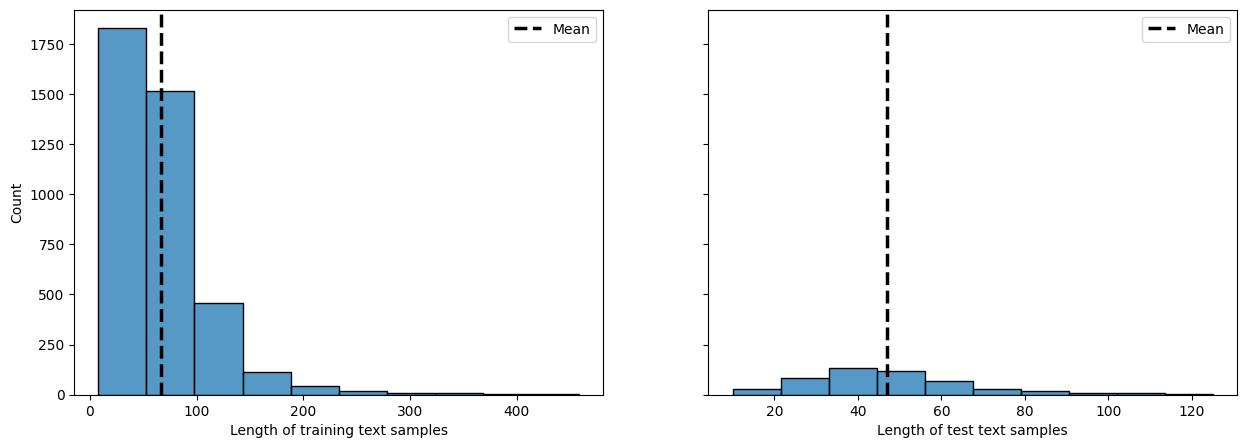

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

train_lengths = train_df["Comments"].str.len()
sns.histplot(ax=axes[0], data=train_lengths, bins=10).set(xlabel="Length of training text samples")
axes[0].axvline(train_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[0].legend()

#dev_lengths = dev_df["text"].str.len()
#sns.histplot(ax=axes[1], data=dev_lengths, bins=10).set(xlabel="Length of dev text samples")
#axes[1].axvline(dev_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
#axes[1].legend()

test_lengths = test_df["text"].str.len()
sns.histplot(ax=axes[1], data=test_lengths, bins=10).set(xlabel="Length of test text samples")
axes[1].axvline(test_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[1].legend()


plt.show()

In [25]:
print(train_lengths.mean());
print(test_lengths.mean());

66.8495
47.08617234468938


In [26]:
dataset = train_df.filter(['cleanText','Label'])
def data_summary(dataset):

    """
        Comments: Comments per class
        words:  words per class
        u_words: unique words per class
    """
    Comments = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].cleanText) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        Comments.append(len(list(dataset[dataset.Label == label].cleanText)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Comments:{}".format(len(list(dataset[dataset.Label==label].cleanText))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return Comments,words,u_words,class_label

#call the fucntion
Comments,words,u_words,class_names = data_summary(dataset)


Class Name :  non-hate
Number of Comments:2061
Number of Words:21565
Number of Unique Words:9652
Most Frequent Words:

‡∞ö‡∞æ‡∞≤‡∞æ	149
lo	131
anna	121
‡∞à	118
‡∞∏‡±Ç‡∞™‡∞∞‡±ç	105
ki	104
‡∞ó‡∞æ‡∞∞‡±Å	104
‡∞Ö‡∞®‡±ç‡∞®	93
sir	92
ga	89

Class Name :  hate
Number of Comments:1939
Number of Words:18251
Number of Unique Words:9178
Most Frequent Words:

ra	142
ki	127
ni	126
lo	120
ga	79
oka	76
na	58
kuda	51
nuvvu	50
‡∞®‡±Å‡∞µ‡±ç‡∞µ‡±Å	50
Total Number of Unique Words:16421


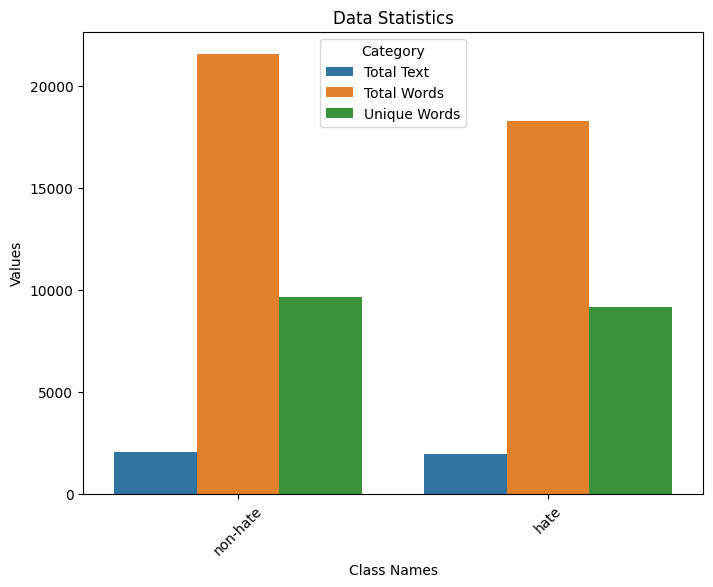

In [27]:
data_matrix = pd.DataFrame({'Total Text':Comments,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

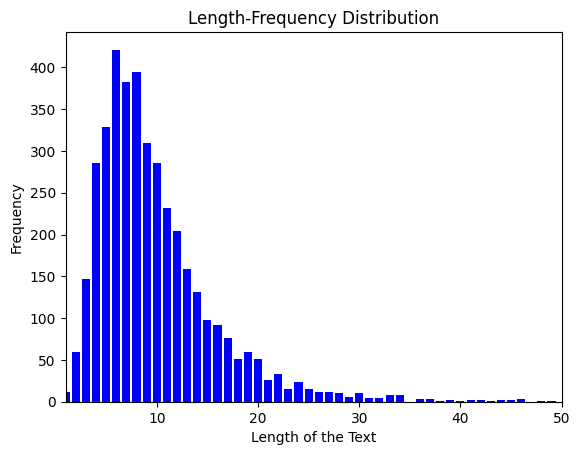

Maximum Length of a Comment: 71
Minimum Length of a Comment: 0
Average Length of a Comment: 10.0


In [28]:
train_df['Comment_length'] = train_df.cleanText.apply(lambda x:len(x.split()))
frequency = dict()
for i in train_df.Comment_length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 50)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Text')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a Comment: {max(train_df.Comment_length)}")
print(f"Minimum Length of a Comment: {min(train_df.Comment_length)}")
print(f"Average Length of a Comment: {round(np.mean(train_df.Comment_length),0)}")

In [29]:
train_df.loc[train_df['Comment_length'] > 40].shape

(22, 6)

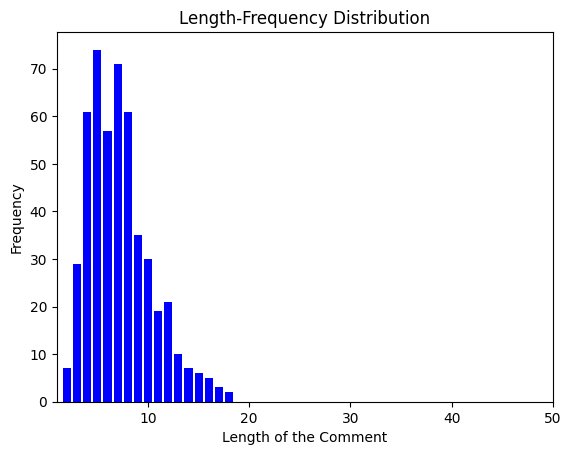

Maximum Length of a Comment: 18
Minimum Length of a Comment: 0
Average Length of a Comment: 7.0


In [30]:
test_df['Comment_length'] = test_df.cleanText.apply(lambda x:len(x.split()))
frequency = dict()
for i in test_df.Comment_length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 50)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Comment')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a Comment: {max(test_df.Comment_length)}")
print(f"Minimum Length of a Comment: {min(test_df.Comment_length)}")
print(f"Average Length of a Comment: {round(np.mean(test_df.Comment_length),0)}")

# Splitting Dataset for Validation

In [31]:
from sklearn.model_selection import train_test_split
Xx_train, Xx_valid, yy_train, yy_valid = train_test_split(train_df['cleanText'], train_df['enc_label'], test_size=0.15, random_state=42, stratify = train_df['enc_label'])

In [32]:
X_train = Xx_train.tolist()
y_train = yy_train.tolist()

X_valid = Xx_valid.tolist()
y_valid = yy_valid.tolist()

X_test = test_with_label['text'].tolist()
y_data_with_label = test_with_label['enc_label'].tolist()

# ML Models

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

# Example: Training individual models
model_rf = RandomForestClassifier(n_estimators=1000)  #use class_weight='balanced'
model_rf.fit(X_train_tfidf, y_train)

# Predict on the test set

# Evaluation

## Confusion Matrix by train_test_split validation set (During Contest)

In [45]:
y_pred = model_rf.predict(X_val_tfidf)

accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.7433333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       309
           1       0.79      0.65      0.71       291

    accuracy                           0.74       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.75      0.74      0.74       600



## Confusion Matrix after Labeled Test Data revealed (After Contest)

In [46]:
y_pred = model_rf.predict(X_test_tfidf)
accuracy = accuracy_score(y_data_with_label, y_pred)
report = classification_report(y_data_with_label, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.5731462925851704
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       249
           1       0.60      0.44      0.51       250

    accuracy                           0.57       499
   macro avg       0.58      0.57      0.57       499
weighted avg       0.58      0.57      0.57       499



## LR

In [47]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
model_lr = LogisticRegression(solver='liblinear', C=1)
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=1, solver='liblinear')

## Confusion Matrix by train_test_split validation set (During Contest)

In [48]:
# Predict on the test set
y_pred_lr = model_lr.predict(X_val_tfidf)

# Evaluation
accuracy_lr = accuracy_score(y_valid, y_pred_lr)
classification_report_lr = classification_report(y_valid, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr) # 0.63      0.63      0.63

Logistic Regression Accuracy: 0.7516666666666667
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       309
           1       0.74      0.75      0.75       291

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.75      0.75      0.75       600



## Confusion Matrix After test dataset revealed (After Contest)

In [49]:
# Predict on the test set
y_pred_lr = model_lr.predict(X_test_tfidf)

# Evaluation
accuracy_lr = accuracy_score(y_data_with_label, y_pred_lr)
classification_report_lr = classification_report(y_data_with_label, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr) # 0.63      0.63      0.63

Logistic Regression Accuracy: 0.6332665330661322
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       249
           1       0.63      0.64      0.64       250

    accuracy                           0.63       499
   macro avg       0.63      0.63      0.63       499
weighted avg       0.63      0.63      0.63       499



## SVM

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Support Vector Machine (SVM)
model_svm = SVC(C=1, class_weight='balanced', kernel='linear')
model_svm.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = model_svm.predict(X_test_tfidf)

# Evaluation
accuracy_svm = accuracy_score(y_data_with_label, y_pred_svm)
classification_report_svm = classification_report(y_data_with_label, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm) # 0.65      0.65      0.65

SVM Accuracy: 0.6492985971943888
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65       249
           1       0.66      0.63      0.64       250

    accuracy                           0.65       499
   macro avg       0.65      0.65      0.65       499
weighted avg       0.65      0.65      0.65       499



## Ensemble Majority Voting

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

# Example: Training individual models
model_rf = RandomForestClassifier(n_estimators=1000)  #use class_weight='balanced' if classes are imbalanced
model_rf.fit(X_train_tfidf, y_train)

model_lr = LogisticRegression(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'newton-cg', max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

model_svm = SVC(kernel='linear', C = 1, class_weight = 'balanced')    #kernel='poly'  kernel='rbf'   kernel='sigmoid'
model_svm.fit(X_train_tfidf, y_train)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [51]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples with model names and trained models
models = [
    ('RandomForest', model_rf),
    ('LogisticRegression', model_lr),
    ('SVM', model_svm),
    ('DecisionTree', model_dt)
]

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=models, voting='hard') # 'hard' voting for majority class
ensemble_model.fit(X_train_tfidf, y_train)


VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(n_estimators=1000)),
                             ('LogisticRegression',
                              LogisticRegression(C=1, class_weight='balanced',
                                                 max_iter=1000,
                                                 solver='newton-cg')),
                             ('SVM',
                              SVC(C=1, class_weight='balanced',
                                  kernel='linear')),
                             ('DecisionTree', DecisionTreeClassifier())])

## Confusion Matrix with train_test_split's dev set(during contest)

In [52]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = ensemble_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7383333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       309
           1       0.80      0.61      0.69       291

    accuracy                           0.74       600
   macro avg       0.75      0.73      0.73       600
weighted avg       0.75      0.74      0.73       600



## Confusion Matrix after test data revealed (after contest)

In [53]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = ensemble_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_data_with_label, y_pred)
report = classification_report(y_data_with_label, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.5951903807615231
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       249
           1       0.63      0.46      0.53       250

    accuracy                           0.60       499
   macro avg       0.60      0.60      0.59       499
weighted avg       0.60      0.60      0.59       499



# Deep Learning


## BiGRU


In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model

In [55]:
tokenizer = Tokenizer(num_words = 20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)     #tokenization
tokenizer.fit_on_texts(train_df['cleanText'])
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [56]:
print(vocab_size)

15151


In [58]:
max_len = 80
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
print(len(tokenizer.word_index))
train_pad_sequences =  pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_pad_sequences =  pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

# Validation Sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_pad_sequences =  pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of test Sequences :" ,test_pad_sequences.shape)

15150
Number of Training Sequences : (3400, 80)
Number of Validation Sequences : (600, 80)
Number of test Sequences : (499, 80)


In [59]:
num_classes = 2            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/HOLD/" + "BiGRU_One.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(GRU(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 300)           4545300   
                                                                 
 bidirectional (Bidirection  (None, 80, 400)           602400    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 1)                 32001     
                                                                 
Total params: 5179701 (19.76 MB)
Trainable params: 5179701 (19.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    yy_train,
    epochs=30,
    batch_size=32,
    validation_data=(validation_pad_sequences, yy_valid),
    verbose=1,
    callbacks=callback_list
)
 # as here weight is not using

Epoch 1/30
107/107 [==============================] - ETA: 0s - loss: 0.6165 - accuracy: 0.6315
Epoch 1: val_accuracy improved from -inf to 0.76833, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/BiGRU_One.h5
107/107 [==============================] - 44s 261ms/step - loss: 0.6165 - accuracy: 0.6315 - val_loss: 0.4920 - val_accuracy: 0.7683
Epoch 2/30
107/107 [==============================] - ETA: 0s - loss: 0.1926 - accuracy: 0.9306
Epoch 2: val_accuracy did not improve from 0.76833
107/107 [==============================] - 9s 83ms/step - loss: 0.1926 - accuracy: 0.9306 - val_loss: 0.6724 - val_accuracy: 0.7300
Epoch 3/30
107/107 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9912
Reached 99.00% accuracy so we will stop trianing

Epoch 3: val_accuracy did not improve from 0.76833
107/107 [==============================] - 6s 57ms/step - loss: 0.0379 - accuracy: 0.9912 - val_loss: 0.7161 - val_accuracy: 0.6933


### Classification Report before Test Data Revealed with train_test_split Validation Set

In [68]:
# Load the saved model
model = load_model(filepath)
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(y_valid,y_pred,average='weighted')*100)
print("Accuracy:",accuracy_score(y_valid,y_pred)*100)

19/19 [==============================] - 1s 9ms/step
F1-Score: 35.01320132013201
Accuracy: 51.5


In [69]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(y_valid, y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       309
           1       0.00      0.00      0.00       291

    accuracy                           0.52       600
   macro avg       0.26      0.50      0.34       600
weighted avg       0.27      0.52      0.35       600



### Classification Report after test data revealed

In [65]:
# Load the saved model
model = load_model(filepath)
# prediction
y_pred = np.argmax(model.predict(test_pad_sequences), axis=-1)

print("F1-Score:",f1_score(y_data_with_label,y_pred,average='weighted')*100)
print("Accuracy:",accuracy_score(y_data_with_label,y_pred)*100)

16/16 [==============================] - 2s 12ms/step
F1-Score: 33.22205909144492
Accuracy: 49.899799599198396


In [66]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(y_data_with_label, y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       249
           1       0.00      0.00      0.00       250

    accuracy                           0.50       499
   macro avg       0.25      0.50      0.33       499
weighted avg       0.25      0.50      0.33       499



## FastText CNN + BiLSTM

In [70]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [71]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [72]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [73]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = '/content/drive/MyDrive/Colab Notebooks/HOLD/' +"CNN_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model2 = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix],trainable=False, input_length = max_len),
tf.keras.layers.Conv1D(128, 2, activation='relu'),
tf.keras.layers.MaxPooling1D(2),
tf.keras.layers.Bidirectional(LSTM(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid')])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 300)           4545300   
                                                                 
 conv1d (Conv1D)             (None, 79, 128)           76928     
                                                                 
 max_pooling1d (MaxPooling1  (None, 39, 128)           0         
 D)                                                              
                                                                 
 bidirectional_1 (Bidirecti  (None, 39, 400)           526400    
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 15600)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [74]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model2.fit(train_pad_sequences,
    yy_train,
    epochs= 30,
    batch_size = 32,
    validation_data=(validation_pad_sequences, yy_valid),
    verbose = 1,
    callbacks = callback_list)

Epoch 1/30
107/107 [==============================] - ETA: 0s - loss: 0.6737 - accuracy: 0.5579
Epoch 1: val_accuracy improved from -inf to 0.60833, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/CNN_BiLSTMModel.h5
107/107 [==============================] - 13s 29ms/step - loss: 0.6737 - accuracy: 0.5579 - val_loss: 0.6542 - val_accuracy: 0.6083
Epoch 2/30
101/107 [===========================>..] - ETA: 0s - loss: 0.6263 - accuracy: 0.6383
Epoch 2: val_accuracy improved from 0.60833 to 0.65833, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/CNN_BiLSTMModel.h5
107/107 [==============================] - 1s 12ms/step - loss: 0.6271 - accuracy: 0.6385 - val_loss: 0.6262 - val_accuracy: 0.6583
Epoch 3/30
104/107 [============================>.] - ETA: 0s - loss: 0.5925 - accuracy: 0.6581
Epoch 3: val_accuracy improved from 0.65833 to 0.66167, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/CNN_BiLSTMModel.h5
107/107 [==============================] - 3s

### Classification Report with train_test_split's validation set

In [88]:
# Load the saved model
model2 = load_model('/content/drive/MyDrive/Colab Notebooks/HOLD/' + "CNN_BiLSTMModel.h5")
# prediction
y_pred = np.argmax(model2.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(y_valid,y_pred,average='weighted')*100)
print("Accuracy:",accuracy_score(y_valid,y_pred)*100)

19/19 [==============================] - 2s 7ms/step
F1-Score: 35.01320132013201
Accuracy: 51.5


In [89]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(y_valid, y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       309
           1       0.00      0.00      0.00       291

    accuracy                           0.52       600
   macro avg       0.26      0.50      0.34       600
weighted avg       0.27      0.52      0.35       600



### Classification Report after labeled test data revealed

In [90]:
# Load the saved model
model2 = load_model('/content/drive/MyDrive/Colab Notebooks/HOLD/' + "CNN_BiLSTMModel.h5")
# prediction
y_pred = np.argmax(model2.predict(test_pad_sequences), axis=-1)

print("F1-Score:",f1_score(y_data_with_label,y_pred,average='weighted')*100)
print("Accuracy:",accuracy_score(y_data_with_label,y_pred)*100)

16/16 [==============================] - 1s 9ms/step
F1-Score: 33.22205909144492
Accuracy: 49.899799599198396


In [91]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(y_data_with_label, y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       249
           1       0.00      0.00      0.00       250

    accuracy                           0.50       499
   macro avg       0.25      0.50      0.33       499
weighted avg       0.25      0.50      0.33       499



In [ ]:
# test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()

In [ ]:
# test_data['id'] = test_data.index + 1
# run = pd.DataFrame(test_data['id'])
# run['text'] = test_data['text']
# run['label'] = test_pred
# run['label'] = run['label'].apply(actual_label)
# run

## FastText BiGRU

In [81]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = '/content/drive/MyDrive/Colab Notebooks/HOLD/' +"BiGRUModel_FastText.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix],trainable=False, input_length = max_len),
# tf.keras.layers.Conv1D(128, 2, activation='relu'),
# tf.keras.layers.MaxPooling1D(2),
tf.keras.layers.Bidirectional(GRU(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 80, 300)           4545300   
                                                                 
 bidirectional_2 (Bidirecti  (None, 80, 400)           602400    
 onal)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 32000)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 32001     
                                                                 
Total params: 5179701 (19.76 MB)
Trainable params: 634401 (2.42 MB)
Non-trainable params: 4545300 (17.34 MB)
_________________________________________________________________


In [82]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_pad_sequences,
    yy_train,
    epochs= 30,
    batch_size = 32,
    validation_data=(validation_pad_sequences, yy_valid),
    verbose = 1,
    callbacks = callback_list)

Epoch 1/30
107/107 [==============================] - ETA: 0s - loss: 0.6709 - accuracy: 0.5550
Epoch 1: val_accuracy improved from -inf to 0.55333, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/BiGRUModel_FastText.h5
107/107 [==============================] - 15s 28ms/step - loss: 0.6709 - accuracy: 0.5550 - val_loss: 0.6683 - val_accuracy: 0.5533
Epoch 2/30
104/107 [============================>.] - ETA: 0s - loss: 0.6425 - accuracy: 0.6073
Epoch 2: val_accuracy improved from 0.55333 to 0.64833, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/BiGRUModel_FastText.h5
107/107 [==============================] - 2s 17ms/step - loss: 0.6422 - accuracy: 0.6085 - val_loss: 0.6391 - val_accuracy: 0.6483
Epoch 3/30
107/107 [==============================] - ETA: 0s - loss: 0.6139 - accuracy: 0.6435
Epoch 3: val_accuracy did not improve from 0.64833
107/107 [==============================] - 2s 17ms/step - loss: 0.6139 - accuracy: 0.6435 - val_loss: 0.6483 - val_accura

### Classification Report with train_test_split validation set

In [92]:
# Load the saved model
model = load_model('/content/drive/MyDrive/Colab Notebooks/HOLD/BiGRUModel_FastText.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(y_valid,y_pred,average='weighted')*100)
print("Accuracy:",accuracy_score(y_valid,y_pred)*100)

19/19 [==============================] - 1s 7ms/step
F1-Score: 35.01320132013201
Accuracy: 51.5


In [93]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(y_valid, y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       309
           1       0.00      0.00      0.00       291

    accuracy                           0.52       600
   macro avg       0.26      0.50      0.34       600
weighted avg       0.27      0.52      0.35       600



### Classification Report after labeled test data revealed

In [94]:
# Load the saved model
model = load_model('/content/drive/MyDrive/Colab Notebooks/HOLD/BiGRUModel_FastText.h5')
# prediction
y_pred = np.argmax(model.predict(test_pad_sequences), axis=-1)

print("F1-Score:",f1_score(y_data_with_label,y_pred,average='weighted')*100)
print("Accuracy:",accuracy_score(y_data_with_label,y_pred)*100)

16/16 [==============================] - 1s 9ms/step
F1-Score: 33.22205909144492
Accuracy: 49.899799599198396


In [87]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(y_data_with_label, y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       249
           1       0.00      0.00      0.00       250

    accuracy                           0.50       499
   macro avg       0.25      0.50      0.33       499
weighted avg       0.25      0.50      0.33       499



# Pretrained BERT MODELS By Pytorch

In [ ]:
!pip install transformers

In [ ]:
import torch
import transformers
import tensorflow as tf
from transformers import DistilBertTokenizer, DistilBertModel   # for distilBERT

from transformers import BertTokenizer, BertModel     #for mBERT

from transformers import AutoTokenizer, AutoModel    # for pretrained dedicated BERT from Huggingface


# Optional: If you want to fine-tune the model on your specific task
from transformers import DistilBertForSequenceClassification

# Additional imports for dataset handling (if using custom datasets)
from torch.utils.data import Dataset, DataLoader
# Your custom dataset class import, if applicable
# from your_custom_module import NewsDataset

from tqdm import tqdm

## Creating Dataset

In [ ]:

class NewsDataset(Dataset):
    def __init__(self, texts, labels=None, tokenizer=None, max_len=None, source_to_idx=None, is_labeled=True):
        self.tokenizer = tokenizer
        self.texts = texts
        self.labels = labels if is_labeled else None
        self.source_to_idx = source_to_idx
        self.max_len = max_len
        self.is_labeled = is_labeled

    def __len__(self):
        return len(self.texts)


    def __getitem__(self, index):
        cleanText = self.texts[index]

        inputs = self.tokenizer.encode_plus(
            cleanText,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )

        if self.is_labeled:
            Annotations = self.labels[index]
            return {
                'ids': torch.tensor(inputs['input_ids'], dtype=torch.long),
                'mask': torch.tensor(inputs['attention_mask'], dtype=torch.long),
                'targets': torch.tensor(self.source_to_idx[Annotations], dtype=torch.long)
            }
        else:
            return {
                'ids': torch.tensor(inputs['input_ids'], dtype=torch.long),
                'mask': torch.tensor(inputs['attention_mask'], dtype=torch.long)
            }


'''
    def __getitem__(self, index):
        cleanNews = self.texts[index]
        Label = self.labels[index]

        inputs = self.tokenizer.encode_plus(
            cleanNews,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )

        return {
            'ids': torch.tensor(inputs['input_ids'], dtype=torch.long),
            'mask': torch.tensor(inputs['attention_mask'], dtype=torch.long),
            'targets': torch.tensor(self.source_to_idx[Label], dtype=torch.long)
        }   '''

"\n    def __getitem__(self, index):\n        cleanNews = self.texts[index]\n        Label = self.labels[index]\n\n        inputs = self.tokenizer.encode_plus(\n            cleanNews,\n            None,\n            add_special_tokens=True,\n            max_length=self.max_len,\n            padding='max_length',\n            return_token_type_ids=True,\n            truncation=True\n        )\n\n        return {\n            'ids': torch.tensor(inputs['input_ids'], dtype=torch.long),\n            'mask': torch.tensor(inputs['attention_mask'], dtype=torch.long),\n            'targets': torch.tensor(self.source_to_idx[Label], dtype=torch.long)\n        }   "

## Tokenizer

In [ ]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

model_name= 'ai4bharat/indic-bert'

tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)        #change transformers.(modify).from_pretrained
MAX_LEN = 256
BATCH_SIZE = 16

unique_sources = ['hate', 'non-hate']
source_to_idx = {source: idx for idx, source in enumerate(unique_sources)}

# dev_set = NewsDataset(dev_df, tokenizer, MAX_LEN, source_to_idx)

In [ ]:
print(source_to_idx)

{'hate': 0, 'non-hate': 1}


In [ ]:
X_train_text = Xx_train.tolist()
y_train_labels = yy_train.tolist()
X_data_with_label_text = XX_data_with_label.tolist()
X_data_with_label_labels = yX_data_with_label.tolist()
X_test_text = test_df['cleanText'].tolist()

In [ ]:
train_set = NewsDataset(X_train_text, y_train_labels, tokenizer=tokenizer, max_len=MAX_LEN, source_to_idx=source_to_idx, is_labeled=True)
valid_set = NewsDataset(X_data_with_label_text, X_data_with_label_labels, tokenizer=tokenizer, max_len=MAX_LEN, source_to_idx=source_to_idx, is_labeled=True)
test_set = NewsDataset(X_test_text, tokenizer=tokenizer, max_len=MAX_LEN, source_to_idx=source_to_idx, is_labeled=False)

In [ ]:
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
dev_loader = DataLoader(valid_set, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

## Creating the source model classifier

In [ ]:
## for multiclass classification and Class imbalance handling
class SourceClassifier(torch.nn.Module):
    def __init__(self, class_weights):             #if no class imbalance remove class_weights argument from __init__ fun
        super(SourceClassifier, self).__init__()
        self.distilbert = transformers.BertModel.from_pretrained(model_name)    #change transformers.(modify).from_pretrained
        self.dropout = torch.nn.Dropout(0.3)
        self.output = torch.nn.Linear(768, len(train_df['enc_label'].unique()))
        self.class_weights = class_weights   #this line is only for class imbalance handling

    def forward(self, ids, mask):
        output = self.distilbert(ids, attention_mask=mask)
        output = self.dropout(output[0][:, 0, :])
        output = self.output(output)
        return output

### Forward Pass

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

train_df['cleanText'] = train_df['cleanText'].astype(str)

class_values = train_df['enc_label'].unique()
class_weights = compute_class_weight('balanced', classes=class_values, y= train_df['enc_label'])

# Convert class weights to tensor
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

# Initialize model with class weights
model = SourceClassifier(class_weights_tensor)
#criterion = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)

###IF class imbalance is not present write just 3 lines below and avoid lines above

#model = SourceClassifier()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  ## this enables GPU when it's available else runs in CPU
model.to(device)

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertModel were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['encoder.layer.4.attention.self.value.bias', 'encoder.layer.10.attention.self.value.bias', 'encoder.layer.5.attention.output.LayerNorm.weight', 'encoder.layer.9.attention.self.key.bias', 'encoder.layer.11.output.dense.bias', 'encoder.layer.6.intermediate.dense.bias', 'encoder.layer.2.attention.self.query.bias', 'encoder.layer.8.output.dense.bias', 'encoder.layer.2.attention.output.LayerNorm.weight', 'encoder.layer.9.attention.output.dense.weight', 'encoder.layer.8.attention.output.dense.weight', 'encoder.layer.8.intermediate.dense.weight', 'encoder.layer.6.attention.self.key.bias', 'encoder.layer.9.output.LayerNorm.weight', 'encoder.layer.1.output.dense.bias', 'encoder.layer.0.attention.self.key.bias', 'encoder.lay

SourceClassifier(
  (distilbert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(200000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

## Training And Testing

In [ ]:
EPOCHS = 10
LEARNING_RATE = 3e-5
optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)
loss_function = torch.nn.CrossEntropyLoss(weight=class_weights_tensor).to(device)

#train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
#dev_loader = DataLoader(dev_set, batch_size=BATCH_SIZE, shuffle=True)

### See what learning rate to set(Optional)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7)        ### Change here 1e-7-->1.7e-6
num_epochs = 3  # Set the number of epochs for LR range testing
best_loss = float('inf')
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        # Process your batch and perform training steps
        ids = batch['ids'].to(device)
        mask = batch['mask'].to(device)
        targets = batch['targets'].to(device)

        optimizer.zero_grad()
        outputs = model(ids.to(device), mask.to(device))
        outputs = outputs.to(device)
        loss = loss_function(outputs, targets.to(device))
        loss.backward()
        optimizer.step()

        # Track the best loss during LR range test
        if loss < best_loss:
            best_loss = loss

            # Update the learning rate in a range suitable for LR test
            optimizer.param_groups[0]['lr'] *= 1.5  # Adjust the LR update factor as needed

# The best learning rate will be around optimizer.param_groups[0]['lr']
print(f"Best learning rate: {optimizer.param_groups[0]['lr']}")

KeyError: 1

In [ ]:

for epoch in range(EPOCHS):
    model.train()
    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1} - Training")
    for batch in train_bar:
        ids = batch['ids'].to(device)
        mask = batch['mask'].to(device)
        targets = batch['targets'].to(device)

        optimizer.zero_grad()
        outputs = model(ids, mask)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()

        train_bar.set_postfix(loss=loss.item())

    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

In [ ]:
dev_bar = tqdm(dev_loader, desc=f"Epoch {epoch+1} - Testing")
for batch in dev_bar:
    ids = batch['ids'].to(device)
    mask = batch['mask'].to(device)
    targets = batch['targets'].to(device)

    with torch.no_grad():
        outputs = model(ids, mask)
        loss = loss_function(outputs, targets)
        total_loss += loss.item()

        _,predicted = torch.max(outputs, 1)
        total_correct += (predicted == targets).sum().item()
        total_samples += targets.size(0)

        dev_bar.set_postfix(loss=loss.item())

avg_loss = total_loss / len(dev_loader)
accuracy = total_correct / total_samples

print(f"Epoch: {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

# ktrain
# l3cube-pune/indic-sentence-similarity-sbert

In [36]:
!pip install ktrain

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25.3/25.3 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 981.5/981.5 kB 54.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 76.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 468.8/468.8 kB 42.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setu

In [37]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [38]:
import ktrain
from ktrain import text

In [39]:
categories=['hate','non-hate']

In [40]:
import numpy as np
import tensorflow as tf

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
model_name = "l3cube-pune/indic-sentence-similarity-sbert"
trans = text.Transformer(model_name,maxlen=100,class_names=categories)    #try with mxlen=100

config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/950M [00:00<?, ?B/s]

In [103]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)
test = trans.preprocess_test(X_test,y_data_with_label)

preprocessing train...
language: te
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


tokenizer_config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: te
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 34


preprocessing test...
language: te
test sequence lengths:
	mean : 7
	95percentile : 13
	99percentile : 16


In [104]:
model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

In [ ]:
# learner.lr_find(show_plot = True,max_epochs=10)

In [105]:
learner.fit_onecycle(1e-5,15)   # 15 epochs 77(macro) for 1e-5



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/15
213/213 [==============================] - 140s 458ms/step - loss: 0.6914 - accuracy: 0.6238 - val_loss: 0.6865 - val_accuracy: 0.7533
Epoch 2/15
213/213 [==============================] - 92s 432ms/step - loss: 0.6710 - accuracy: 0.7150 - val_loss: 0.6406 - val_accuracy: 0.7433
Epoch 3/15
213/213 [==============================] - 89s 418ms/step - loss: 0.6080 - accuracy: 0.7626 - val_loss: 0.5710 - val_accuracy: 0.7700
Epoch 4/15
213/213 [==============================] - 90s 421ms/step - loss: 0.5346 - accuracy: 0.7909 - val_loss: 0.5427 - val_accuracy: 0.7500
Epoch 5/15
213/213 [==============================] - 89s 416ms/step - loss: 0.4595 - accuracy: 0.8288 - val_loss: 0.4969 - val_accuracy: 0.7800
Epoch 6/15
213/213 [==============================] - 91s 427ms/step - loss: 0.3887 - accuracy: 0.8632 - val_loss: 0.5016 - val_accuracy: 0.7867
Epoch 7/15
213/213 [==============================] - 95s 445ms/st

## Classification Report with train_test_split's validation set

In [106]:
learner.validate(class_names=categories)

19/19 [==============================] - 11s 341ms/step
              precision    recall  f1-score   support

        hate       0.82      0.76      0.79       309
    non-hate       0.76      0.83      0.79       291

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



array([[234,  75],
       [ 50, 241]])

In [107]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [108]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/HOLD"

predictor.save(folder_path+'Transformers_Models'+'/puneIndicSBERT_1eMinus5_16_15')


In [44]:
predictor = ktrain.load_predictor("/content/drive/MyDrive/Colab Notebooks/HOLD/"+'Transformers_Models'+'/puneIndicSBERT_1eMinus5_16_15')

Exception: ignored

## Classification Report after labeled test data revealed

In [109]:
y_pred = predictor.predict(X_test)

In [1]:
# Assuming y_pred is a list or array containing 'hate' and 'non-hate' labels
y_pred = [0 if label == 'hate' else 1 for label in y_pred]

# Now y_pred_mapped contains 0 for 'hate' and 1 for 'non-hate'


NameError: ignored

In [111]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(test_with_label['label'], y_pred)
report = classification_report(test_with_label['label'], y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.3106212424849699
Classification Report:
              precision    recall  f1-score   support

        hate       0.31      0.31      0.31       250
    non-hate       0.31      0.31      0.31       249

    accuracy                           0.31       499
   macro avg       0.31      0.31      0.31       499
weighted avg       0.31      0.31      0.31       499



In [ ]:
run = pd.DataFrame(test_df['text'])
run['label'] = y_pred
# run
run['label'].value_counts()

In [ ]:
run.to_csv('/kaggle/working/' +'model1.csv',index = False) # for 3e-5, batch = 16, epochs = 15

In [ ]:
run.to_csv('/kaggle/working/' +'model1.tsv',index = False) # for 3e-5, batch = 16, epochs = 15

In [127]:
model2 = trans.get_classifier()
learner2 = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=32)
learner2.fit_onecycle(1e-5,10)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/10
125/125 [==============================] - 117s 763ms/step - loss: 0.6485 - accuracy: 0.6770 - val_loss: 0.5982 - val_accuracy: 0.7114
Epoch 2/10
125/125 [==============================] - 87s 694ms/step - loss: 0.4987 - accuracy: 0.7853 - val_loss: 0.6446 - val_accuracy: 0.6633
Epoch 3/10
125/125 [==============================] - 87s 694ms/step - loss: 0.3658 - accuracy: 0.8580 - val_loss: 0.5417 - val_accuracy: 0.7475
Epoch 4/10
125/125 [==============================] - 87s 699ms/step - loss: 0.2394 - accuracy: 0.9168 - val_loss: 0.6299 - val_accuracy: 0.7335
Epoch 5/10
125/125 [==============================] - 88s 705ms/step - loss: 0.1713 - accuracy: 0.9448 - val_loss: 0.7677 - val_accuracy: 0.7495
Epoch 6/10
125/125 [==============================] - 86s 691ms/step - loss: 0.1326 - accuracy: 0.9578 - val_loss: 0.8519 - val_accuracy: 0.6914
Epoch 7/10
125/125 [==============================] - 86s 692ms/st

In [129]:
learner2.validate(class_names=categories)

16/16 [==============================] - 8s 140ms/step
              precision    recall  f1-score   support

        hate       0.75      0.73      0.74       249
    non-hate       0.74      0.76      0.75       250

    accuracy                           0.75       499
   macro avg       0.75      0.75      0.75       499
weighted avg       0.75      0.75      0.75       499



array([[183,  66],
       [ 60, 190]])

In [130]:
predictor = ktrain.get_predictor(learner2.model, preproc=trans)
ffolder_path = "/content/drive/MyDrive/Colab Notebooks/HOLD"

predictor.save(folder_path+'Transformers_Models'+'/puneIndicSBERT_5eMinus5')

predictor = ktrain.load_predictor(folder_path+'Transformers_Models'+'/puneIndicSBERT_5eMinus5')

In [ ]:
y_pred = predictor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_data_with_label, y_pred)
report = classification_report(y_data_with_label, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

In [ ]:
y_pred = predictor.predict(X_test)
run = pd.DataFrame(test_df['text'])
run['label'] = y_pred
# run
run['label'].value_counts()

In [ ]:
run.to_csv('/kaggle/working/' +'model2.csv',index = False) # for 3e-5, batch = 16, epochs = 15

In [ ]:
run.to_csv('/kaggle/working/' +'model2.tsv',index = False) # for 3e-5, batch = 16, epochs = 15

##Extras

In [ ]:
import shutil
import os

# Train the model and save the predictor
model = trans.get_classifier()
learner3 = ktrain.get_learner(model, train_data=train, val_data=valid, batch_size=16)
learner3.fit_onecycle(6e-5, 10)
learner3.validate(class_names=categories)

predictor = ktrain.get_predictor(learner3.model, preproc=trans)
folder_path = "/kaggle/working/"
save_folder = 'Transformers_Models/model3'  # Change the folder name to model2

predictor.save(os.path.join(folder_path, save_folder))

# Load the predictor
loaded_predictor = ktrain.load_predictor(os.path.join(folder_path, save_folder))

# Make predictions on test data
y_pred = loaded_predictor.predict(X_test)

# Create a DataFrame with predictions
run = pd.DataFrame(test_df['‡∞é‡∞®‡±ç‡∞®‡∞ø ‡∞∏‡∞æ‡∞∞‡±ç‡∞≤‡±Å ‡∞Ö‡∞Ø‡∞ø‡∞® ‡∞µ‡∞ø‡∞®‡∞æ‡∞≤‡∞®‡∞ø ‡∞â‡∞Ç‡∞¶‡∞ø ‡∞ö‡∞ø‡∞ü‡±ç‡∞ü‡∞ø ‡∞§‡∞≤‡±ç‡∞≤‡∞ø ‡∞∏‡±Ç‡∞™‡∞∞‡±ç ‡∞Æ‡∞æ'])
run['label'] = y_pred

# Save predictions to CSV and TSV
run.to_csv(os.path.join(folder_path, 'model3.csv'), index=False)
run.to_csv(os.path.join(folder_path, 'model3.tsv'), sep='\t', index=False)

# Create a zip archive of the model files
source_folder = os.path.join(folder_path, save_folder)
zip_filename = 'model3.zip'
shutil.make_archive(zip_filename.split('.')[0], 'zip', source_folder)

In [ ]:
import shutil
import os

# Train the model and save the predictor
model = trans.get_classifier()
learner3 = ktrain.get_learner(model, train_data=train, val_data=valid, batch_size=16)
learner3.fit_onecycle(8e-5, 10)
learner3.validate(class_names=categories)

predictor = ktrain.get_predictor(learner3.model, preproc=trans)
folder_path = "/kaggle/working/"
save_folder = 'Transformers_Models/model3'  # Change the folder name to model2

predictor.save(os.path.join(folder_path, save_folder))

# Load the predictor
loaded_predictor = ktrain.load_predictor(os.path.join(folder_path, save_folder))

# Make predictions on test data
y_pred = loaded_predictor.predict(X_test)

# Create a DataFrame with predictions
run = pd.DataFrame(test_df['‡∞é‡∞®‡±ç‡∞®‡∞ø ‡∞∏‡∞æ‡∞∞‡±ç‡∞≤‡±Å ‡∞Ö‡∞Ø‡∞ø‡∞® ‡∞µ‡∞ø‡∞®‡∞æ‡∞≤‡∞®‡∞ø ‡∞â‡∞Ç‡∞¶‡∞ø ‡∞ö‡∞ø‡∞ü‡±ç‡∞ü‡∞ø ‡∞§‡∞≤‡±ç‡∞≤‡∞ø ‡∞∏‡±Ç‡∞™‡∞∞‡±ç ‡∞Æ‡∞æ'])
run['label'] = y_pred

# Save predictions to CSV and TSV
run.to_csv(os.path.join(folder_path, 'model3.csv'), index=False)
run.to_csv(os.path.join(folder_path, 'model3.tsv'), sep='\t', index=False)

# Create a zip archive of the model files
source_folder = os.path.join(folder_path, save_folder)
zip_filename = 'model3.zip'
shutil.make_archive(zip_filename.split('.')[0], 'zip', source_folder)

# Ktrain indicBert

In [ ]:
model_name = 'ai4bharat/indic-bert'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_data_with_label,X_data_with_label)
model = trans.get_classifier()
Indiclearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

In [ ]:
learner.lr_find(show_plot = True,max_epochs=15)

In [ ]:
Indiclearner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
Indiclearner.fit_onecycle(5e-5,15)

In [ ]:
Indiclearner.validate(class_names=categories)

In [ ]:
predictor = ktrain.get_predictor(Indiclearner.model, preproc=trans)
y_pred = predictor.predict(X_test)
# y_pred

In [ ]:
run = pd.DataFrame(test_df['text'])
run['label'] = y_pred
# run
run['label'].value_counts()

In [ ]:
run.to_csv('/kaggle/working/' +'Tamil_Hate_Indic_72_cw.csv',index = False) # for 3e-5, batch = 16, epochs = 15

# Ktrain mBert

In [48]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid, y_valid)
test = trans.preprocess_test(X_test, y_data_with_label)
model = trans.get_classifier()
CasedmBertlearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

preprocessing train...
language: te
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: te
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 34


preprocessing test...
language: te
test sequence lengths:
	mean : 7
	95percentile : 13
	99percentile : 16


In [ ]:
CasedmBertlearner.lr_find(show_plot = True,max_epochs=15)

In [ ]:
CasedmBertlearner.fit_onecycle(2e-5,15)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/15
138/213 [==================>...........] - ETA: 23:56 - loss: 0.6638 - accuracy: 0.6146

In [ ]:
CasedmBertlearner.validate(class_names=categories)

In [ ]:
predictor = ktrain.get_predictor(CasedmBertlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(test_with_label['label'], y_pred)
report = classification_report(test_with_label['label'], y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

In [ ]:
run = pd.DataFrame(test_df['text'])
run['label'] = y_pred
# run
run['label'].value_counts()
run.to_csv('/kaggle/working/' +'Tamil_Hate_CasedmBert_1_cw.csv',index = False)

# Ktrain XLMR

In [ ]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=64,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_data_with_label,X_data_with_label)
model = trans.get_classifier()
XLlearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

In [ ]:
XLlearner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
XLlearner.fit_onecycle(8e-5,15)

In [ ]:
XLlearner.validate(class_names=categories)

In [ ]:
predictor = ktrain.get_predictor(XLlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)
y_pred

In [ ]:
run = pd.DataFrame(test_df['text'])
run['label'] = y_pred
# run
run['label'].value_counts()
run.to_csv('/kaggle/working/' +'Tamil_Hate_XLMR_1_cw.csv',index = False)

# Ktrain DistilmBert

In [ ]:
model_name = 'distilbert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=128,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_data_with_label,X_data_with_label)
model = trans.get_classifier()
Distillearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)



In [ ]:
Distillearner.lr_find(show_plot = True,max_epochs=15)

In [ ]:
Distillearner.fit_onecycle(6e-5,15)

In [ ]:
XLlearner.validate(class_names=categories)

In [ ]:
predictor = ktrain.get_predictor(learner2.model, preproc=trans)
y_pred = predictor.predict(X_test)

# Ktrain mBert Uncased

In [ ]:
!pip install ktrain

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import ktrain
from ktrain import text

In [ ]:
model_name = 'bert-base-multilingual-uncased'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_data_with_label,X_data_with_label)
model = trans.get_classifier()
Distillearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

In [ ]:
Distillearner.lr_find(show_plot = True,max_epochs=15)

In [ ]:
Distillearner.fit_onecycle(6e-5,15)

In [ ]:
XLlearner.validate(class_names=categories)

In [ ]:
predictor = ktrain.get_predictor(learner2.model, preproc=trans)
y_pred = predictor.predict(X_test)

# Ktrain Hate-speech-CNERG/indic-abusive-allInOne-MuRIL

In [ ]:
model_name = 'Hate-speech-CNERG/indic-abusive-allInOne-MuRIL'
trans = text.Transformer(model_name,maxlen=128,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_data_with_label,X_data_with_label)
model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

In [ ]:
learner.lr_find(show_plot = True,max_epochs=15)

# Ktrain l3cube-pune/telugu-bert

In [ ]:
model_name = 'l3cube-pune/telugu-bert'
trans = text.Transformer(model_name,maxlen=128,class_names=categories)
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_data_with_label,X_data_with_label)
model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

In [ ]:
learner.lr_find(show_plot = True,max_epochs=15)

# Combination Model

In [ ]:
pip install pytorch_pretrained_bert

## mBert + NN

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text
bert_preprocess1 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder1 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

In [ ]:
import tensorflow as tf

In [ ]:
#BERT Layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess1(text_input)
outputs = bert_encoder1(preprocessed_text)


In [ ]:
# Neural network layers
input1 = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
input2 = tf.keras.layers.Dense(100, activation='sigmoid', name="input2")(input1)
input3 = tf.keras.layers.Dense(50, activation='sigmoid', name="input3")(input2)
input4 = tf.keras.layers.Dense(15, activation='sigmoid', name="input5")(input3)
output = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(input4)

# Use inputs and outputs to construct a final model
model1 = tf.keras.Model(inputs=[text_input], outputs = [output])

In [ ]:
model1.summary()

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model1.fit(X_train, y_train, epochs=10)

In [ ]:
model1.evaluate(X_data_with_label, X_data_with_label)

In [ ]:
y_predicted = model1.predict(X_data_with_label)
y_predicted = y_predicted.flatten()

In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted.shape

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(X_data_with_label, y_predicted)
cm

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(X_data_with_label, y_predicted))

# mBert + BiLSTM

In [ ]:
bert_preprocess2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

In [ ]:
#BERT Layers
text_input = Input(shape=(), dtype=tf.string, name='cleanText')
preprocessed_text2 = bert_preprocess2(text_input)
outputs2 = bert_encoder2(preprocessed_text2)

In [ ]:
from tensorflow.keras.layers import Reshape, Bidirectional, LSTM, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, Dropout, Input, concatenate
from tensorflow.keras.models import Model


# BERT embeddings
bert_embedding = outputs2['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding = Dropout(0.2)(bert_embedding)

# Reshape BERT embeddings to a 3D tensor
bert_embedding = Reshape((-1, 768))(bert_embedding)  # Replace 768 with the actual hidden size

# Bidirectional LSTM layer
lstm_output = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding)

# Pooling layers
avg_pooling = GlobalAveragePooling1D()(lstm_output)
max_pooling = GlobalMaxPooling1D()(lstm_output)

# Concatenate and additional dense layers
concat_output = concatenate([avg_pooling, max_pooling])
dense_layer = Dense(128, activation='relu')(concat_output)
dense_layer = Dropout(0.3)(dense_layer)

# Additional Dense layer
dense_layer_2 = Dense(64, activation='relu')(dense_layer)
dense_layer_2 = Dropout(0.3)(dense_layer_2)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dense_layer_2)

# Connect the input and output layers to create the model
model2 = Model(inputs=text_input, outputs=output_layer)


In [ ]:
model2.summary()

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model2.fit(X_train, y_train, epochs=10)

In [ ]:
model2.evaluate(X_data_with_label, X_data_with_label)

In [ ]:
y_predicted = model2.predict(X_data_with_label)
y_predicted = y_predicted.flatten()

In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted.shape

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(X_data_with_label, y_predicted)
cm

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(X_data_with_label, y_predicted))

# mBert Uncased + BiLSTM

In [ ]:
bert_preprocess_mbert = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder_mbert = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2")

# BERT Layers
text_input = Input(shape=(), dtype=tf.string, name='cleanText')
preprocessed_text_mbert = bert_preprocess_mbert(text_input)
outputs_mbert = bert_encoder_mbert(preprocessed_text_mbert)

# BERT embeddings
bert_embedding_mbert = outputs_mbert['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding_mbert = Dropout(0.2)(bert_embedding_mbert)

# Reshape BERT embeddings to a 3D tensor
bert_embedding_mbert = Reshape((-1, 512))(bert_embedding_mbert)  # Replace 512 with the actual hidden size

# Bidirectional LSTM layer
lstm_output_mbert = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding_mbert)

# Pooling layers
avg_pooling_mbert = GlobalAveragePooling1D()(lstm_output_mbert)
max_pooling_mbert = GlobalMaxPooling1D()(lstm_output_mbert)

# Concatenate and additional dense layers
concat_output_mbert = concatenate([avg_pooling_mbert, max_pooling_mbert])
dense_layer_mbert = Dense(128, activation='relu')(concat_output_mbert)
dense_layer_mbert = Dropout(0.3)(dense_layer_mbert)

# Additional Dense layer
dense_layer_2_mbert = Dense(64, activation='relu')(dense_layer_mbert)
dense_layer_2_mbert = Dropout(0.3)(dense_layer_2_mbert)

# Output layer
output_layer_mbert = Dense(1, activation='sigmoid')(dense_layer_2_mbert)

# Connect the input and output layers to create the model
model_mbert = Model(inputs=text_input, outputs=output_layer_mbert)

model_mbert.summary()

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model_mbert.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=METRICS)



In [ ]:
model_mbert.fit(X_train, y_train, epochs=10)

In [ ]:
model_mbert.evaluate(X_data_with_label, X_data_with_label)

y_predicted_mbert = model_mbert.predict(X_data_with_label)
y_predicted_mbert = y_predicted_mbert.flatten()

y_predicted_mbert = np.where(y_predicted_mbert > 0.5, 1, 0)
y_predicted_mbert.shape

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm_mbert = confusion_matrix(X_data_with_label, y_predicted_mbert)
cm_mbert

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm_mbert, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(X_data_with_label, y_predicted_mbert))

# BiLSTM + MuRIL BERT

In [ ]:
# bert_encoder2 = hub.KerasLayer("https://tfhub.dev/google/MuRIL-Large/1")
muril_preprocess = hub.KerasLayer("https://tfhub.dev/google/MuRIL_preprocess/1")
muril_encoder = hub.KerasLayer("https://tfhub.dev/google/MuRIL/1")

# BERT Layers
text_input = Input(shape=(), dtype=tf.string, name='cleanText')
preprocessed_text_muril = muril_preprocess(text_input)
outputs_muril = muril_encoder(preprocessed_text_muril)

# BERT embeddings
bert_embedding_muril = outputs_muril['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding_muril = Dropout(0.2)(bert_embedding_muril)

# Reshape BERT embeddings to a 3D tensor
bert_embedding_muril = Reshape((-1, 768))(bert_embedding_muril)  # Replace 768 with the actual hidden size

# Bidirectional LSTM layer
lstm_output_muril = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding_muril)

# Pooling layers
avg_pooling_muril = GlobalAveragePooling1D()(lstm_output_muril)
max_pooling_muril = GlobalMaxPooling1D()(lstm_output_muril)

# Concatenate and additional dense layers
concat_output_muril = concatenate([avg_pooling_muril, max_pooling_muril])
dense_layer_muril = Dense(128, activation='relu')(concat_output_muril)
dense_layer_muril = Dropout(0.3)(dense_layer_muril)

# Additional Dense layer
dense_layer_2_muril = Dense(64, activation='relu')(dense_layer_muril)
dense_layer_2_muril = Dropout(0.3)(dense_layer_2_muril)

# Output layer
output_layer_muril = Dense(1, activation='sigmoid')(dense_layer_2_muril)

# Connect the input and output layers to create the model
model_muril = Model(inputs=text_input, outputs=output_layer_muril)

model_muril.summary()

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model_muril.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=METRICS)

In [ ]:
model_muril.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_data_with_label, X_data_with_label))

In [ ]:
model_muril.evaluate(X_data_with_label, X_data_with_label)

y_predicted_muril = model_muril.predict(X_data_with_label)
y_predicted_muril = y_predicted_muril.flatten()

y_predicted_muril = np.where(y_predicted_muril > 0.5, 1, 0)
y_predicted_muril.shape

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm_muril = confusion_matrix(X_data_with_label, y_predicted_muril)
cm_muril

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm_muril, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(X_data_with_label, y_predicted_muril))

# DL

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)
#print("Keras Version:---",keras.__version__)

## Tokenization

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_data_with_label, y_train, X_data_with_label = train_test_split(train_df['cleanText'], train_df['enc_label'], test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words = 20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)     #tokenization
tokenizer.fit_on_texts(train_df['cleanText'])
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
print(vocab_size)
print(train_df['enc_label'].dtype)

In [ ]:
max_len = 64
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(X_train)#train_df['cleanText']
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(X_data_with_label)
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

In [ ]:
#from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced' ,np.unique(train_data['enc_label']) ,train_data['enc_label'])

#weight = {i : class_weights[i] for i in range(6)}

In [ ]:
#weight

## Model Definition

In [ ]:
label_encoder = LabelEncoder()
y_train = train_df['enc_label']

In [ ]:
num_classes = 1            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/kaggle/input/hate-offensive/ta_off_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 100, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 100,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='softmax')])

model.summary()


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_pad_sequences,
    y_train,
    epochs=15,
    batch_size = 10,
    #validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    validation_data=(validation_pad_sequences, X_data_with_label))
    #class_weight = weight)  # as here weight is not using

In [ ]:
# Load the saved model
model = load_model(filepath)
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(X_data_with_label,y_pred,average=None)*100)
print("Accuracy:",accuracy_score(X_data_with_label,y_pred)*100)

In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(X_data_with_label, y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

## Test Set Prediction

In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

In [ ]:
test_df['id'] = test_df.index + 1
run = pd.DataFrame(test_df['id'])
run['text'] = test_df['cleanText']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run

In [ ]:
run.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 5/tamil_offhate_bilstm.csv',index = False)

# PreTrained Word Embedding(Fasttext)

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [ ]:
tokenizer = Tokenizer(num_words = 40000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_df['cleanText'])
word_index = tokenizer.word_index
vocab_size = len(word_index )+1

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
max_len = 80
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(X_data_with_label)
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_df['cleanText'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

In [ ]:
#from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced',np.unique(train_data['enc_label']) ,train_data['enc_label'])

#weight = {i : class_weights[i] for i in range(5)}

In [ ]:
num_classes = 1

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 5/prt_tamil_off_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300,weights=[embedding_matrix],trainable=False, input_length = max_len),
tf.keras.layers.Conv1D(128, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 128,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(5, activation='softmax')])

model.summary()


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_pad_sequences,
    train_df['enc_label'],
    epochs=200,
    batch_size = 32,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list)
    #class_weight = weight)

In [ ]:
from sklearn.metrics import classification_report
# Load the saved model
model = load_model(f'/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 5/prt_tamil_offhate_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

#Show precision and recall per genre
report = classification_report(X_data_with_label, y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
#print_metrices(X_data_with_label,y_pred)


In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()


In [ ]:
test_df['id'] = test_df.index + 1
run = pd.DataFrame(test_df['id'])
run['text'] = test_df['cleanText']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run


In [ ]:
run.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP Projects/Shared Task 5/tamil_offhate_cnn+bilstm+fasttext.csv',index = False)

In [ ]:
train_df['Label'].value_counts()